### 1 Загрузите файл HR.csv в pandas dataframe

In [127]:
import pandas as pd

data = pd.read_csv('HR.csv')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### 2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)


In [128]:
#уберем столбцы с категориальными данными, для которых основные статистики считать некорректно
df = data.drop(['department', 'salary'], axis=1)

#вычислим основные статистики
for i in df.columns:
    print('\n')
    print('mode', '\t', df[i].mode()[0])
    print(df[i].describe())



mode 	 0.1
count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64


mode 	 0.55
count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64


mode 	 4
count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64


mode 	 135
count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64


mode 	 3
count    14999.000000
mean         3.498233
std          1.460136
min      

### 3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

/tmp/ipykernel_1443275/2399548203.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

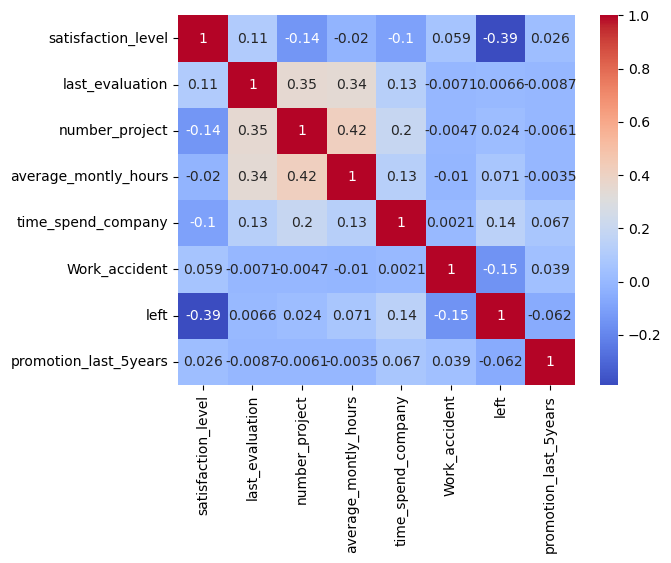

In [129]:
import seaborn as sns

#построим и визуализируем кореляционную матрицу
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [130]:
#сделаем пары коррелирующих значений
import numpy as np
correlation_pairs = correlation_matrix.unstack()

#выполним фильтрацию пар, чтобы исключить пары идентичных значений и повторяющиеся инверсивные пары
filtered_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]
filtered_pairs = filtered_pairs[filtered_pairs.index.get_level_values(0) < filtered_pairs.index.get_level_values(1)]
#вычислим максимально и минимально коррелирующие пары
print('Наиболее скоррелированные переменные: ', '\n', np.abs(filtered_pairs).nlargest(1))
print()
print('Наименее скоррелированные переменные: ', '\n', np.abs(filtered_pairs).nsmallest(1))

Наиболее скоррелированные переменные:  
 average_montly_hours  number_project    0.417211
dtype: float64

Наименее скоррелированные переменные:  
 Work_accident  time_spend_company    0.00212
dtype: float64


### 4 Рассчитайте сколько сотрудников работает в каждом департаменте.

In [131]:
#выделим работающих сотрудников в отдельную выборку и посчитаем количество сотрудников в каждом департаменте
active = data.loc[data['left'] == 0]
active.groupby('department').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
department,,,,,,,,,
IT,954,954,954,954,954,954,954,954,954
RandD,666,666,666,666,666,666,666,666,666
accounting,563,563,563,563,563,563,563,563,563
hr,524,524,524,524,524,524,524,524,524
management,539,539,539,539,539,539,539,539,539
marketing,655,655,655,655,655,655,655,655,655
product_mng,704,704,704,704,704,704,704,704,704
sales,3126,3126,3126,3126,3126,3126,3126,3126,3126
support,1674,1674,1674,1674,1674,1674,1674,1674,1674


### 5 Показать распределение сотрудников по зарплатам.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department
salary,,,,,,,,,
high,1237,1237,1237,1237,1237,1237,1237,1237,1237
low,7316,7316,7316,7316,7316,7316,7316,7316,7316
medium,6446,6446,6446,6446,6446,6446,6446,6446,6446


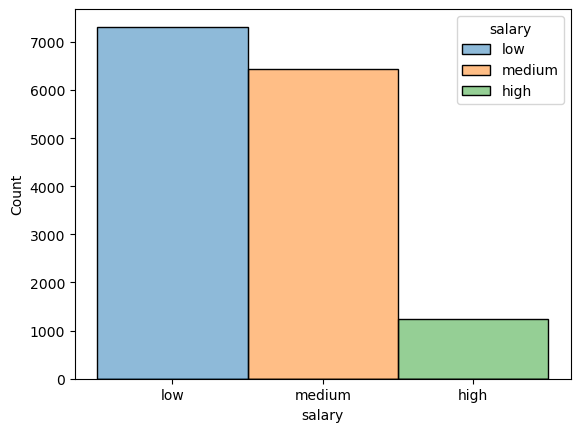

In [132]:
#визуализируем распределение сотрудников по зарплатам
sns.histplot(data=data, x='salary', hue='salary')
data.groupby('salary').count()

### 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

/tmp/ipykernel_1443275/2600112292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active['salary'] = active['salary'].astype('category')


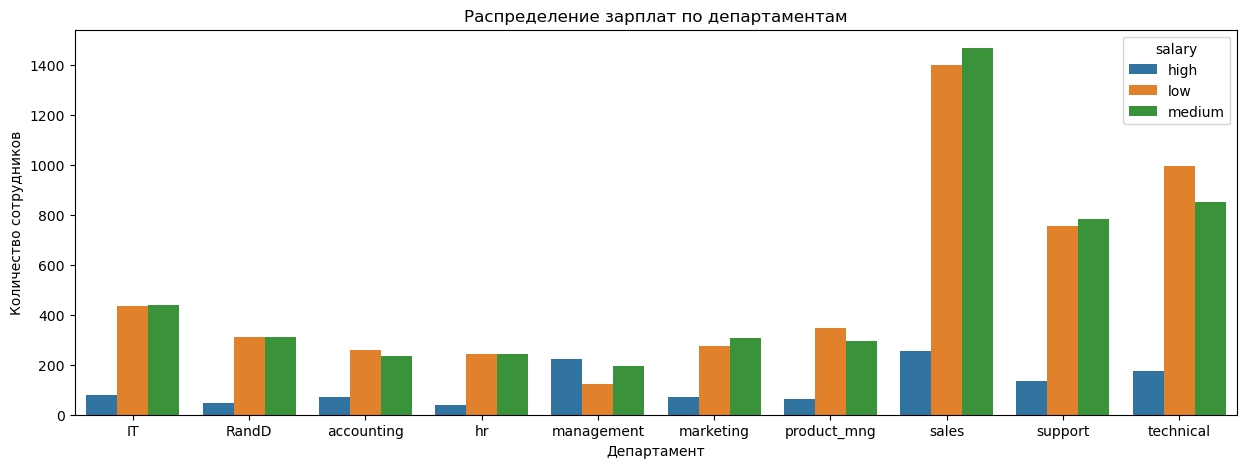

,department,salary,count
0,IT,high,79
1,IT,low,437
2,IT,medium,438
3,RandD,high,47
4,RandD,low,309
5,RandD,medium,310
6,accounting,high,69
7,accounting,low,259
8,accounting,medium,235
9,hr,high,39


In [133]:
import matplotlib.pyplot as plt

#приведем значения колонки к категориальному типу
active['salary'] = active['salary'].astype('category')

#вычислим распределение зарплат внутри департаментов и запишем это в отдельный датафрейм
grouped_data = active.groupby(['department', 'salary'])
salary_distribution = grouped_data.size().reset_index(name='count')

#визуализируем распределение
plt.figure(figsize=(15, 5))
sns.barplot(data=salary_distribution, x='department', y='count', hue='salary')
plt.title('Распределение зарплат по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.show()

salary_distribution

### 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [134]:
#выделим выборки сотрудников с низкой и высокой зарплатой в отдельные датафреймы
high = data.loc[data['salary'] == 'high'] 
low = data.loc[data['salary'] == 'low']

In [135]:
print(len(high), len(low))

1237 7316


<Axes: xlabel='average_montly_hours', ylabel='Density'>

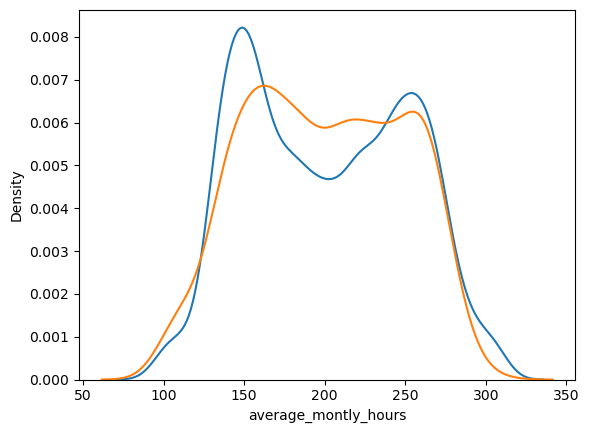

In [136]:
sns.kdeplot(low['average_montly_hours'])
sns.kdeplot(high['average_montly_hours'])

In [137]:
#проверим распредение данные на нормальность
import scipy.stats as stats
stat, p = stats.shapiro(low['average_montly_hours'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.960, p=0.000
Вероятно не нормальное распределение


/home/sergey/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [138]:
import scipy.stats as stats
stat, p = stats.shapiro(high['average_montly_hours'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')
#в обоих случаях распределение не нормальное

stat=0.971, p=0.000
Вероятно не нормальное распределение


In [139]:
#выполним дисперсионный анализ данных
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(high['average_montly_hours'], low['average_montly_hours'])

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=4507096.500, p=0.824
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

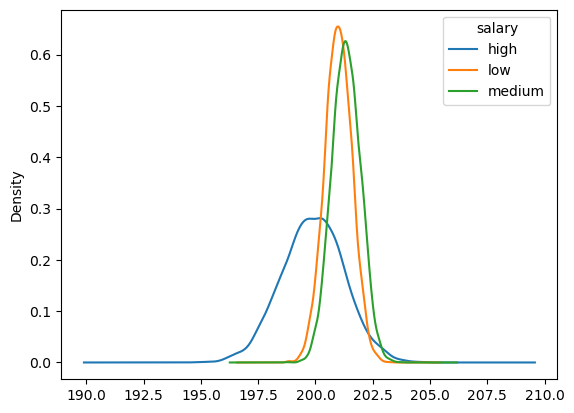

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
boot_1d = []
for i in range(5000):
    boot_mean = data.sample(frac=1, replace=True).groupby('salary')['average_montly_hours'].mean() 
    boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

#из графика ниже можно сделать предположение, что гипотеза скорее не верна и сотрудники с низкой зарплатой отрабатывают большее число часов

In [141]:
#выведем статистические показатели выборок по количеству отработанных часов среди высокооплачиваемых и низкооплачиваемых сотрудников
print(low['average_montly_hours'].describe())
confidence_interval = low['average_montly_hours'].quantile([0.025, 0.975])
print(confidence_interval)
print()
print(high['average_montly_hours'].describe())
confidence_interval = high['average_montly_hours'].quantile([0.025, 0.975])
print(confidence_interval)

count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64
0.025    120.875
0.975    290.125
Name: average_montly_hours, dtype: float64

count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64
0.025    111.9
0.975    278.0
Name: average_montly_hours, dtype: float64


из анализа выше можно предположить, что в целом в общем случае количество отрабатываемых часов сотрудниками с низким и высоким уровнем довольно близко и говорить о том, что высокооплачиваемые сотрудники работают больше низкооплачиваемых не приходится.

### 8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [142]:
#выделим в отдельную выборку уволившихся сотрудников
quitted = data.loc[data['left'] == 1]

In [143]:
print('Доля сотрудников с повышением  за последние 5 лет')
print('Уволившиеся: ', len(quitted.loc[quitted['promotion_last_5years'] == 1])/len(quitted)*100, '%')
print('Работающие: ', len(active.loc[active['promotion_last_5years'] == 1])/len(active)*100, '%')

Доля сотрудников с повышением  за последние 5 лет
Уволившиеся:  0.5320638476617194 %
Работающие:  2.6251312565628284 %


In [144]:
print('Средняя степень удовлетворенности')
print('Уволившиеся: ', quitted['satisfaction_level'].mean())
print('Работающие: ', active['satisfaction_level'].mean())

Средняя степень удовлетворенности
Уволившиеся:  0.4400980117614114
Работающие:  0.666809590479524


In [145]:
print('Среднее количество проектов')
print('Уволившиеся: ', quitted['number_project'].mean())
print('Работающие: ', active['number_project'].mean())

Среднее количество проектов
Уволившиеся:  3.8555026603192384
Работающие:  3.786664333216661


### 9 Разделить данные на тестовую и обучающую выборки
### Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
### Оценить качество модели на тестовой выборке

In [146]:
#уберем категориальные признаки
data.drop(['department', 'salary'], axis=1, inplace=True)

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


#загружаем датасет в признаки и целевую переменную
X = data.drop('left', axis=1)
y = data['left']

#разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#создаем модель, обучаем и проверяем ее
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

#оцениваем качество модели по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('F1 =', f1_score(y_test, y_pred))
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)

Accuracy: 0.7533333333333333
F1 = 0.30970149253731344
AUC-ROC Score: 0.5739717603009206
